In [9]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
import japanize_matplotlib
from PIL import Image
import os
import cv2

from NN_functions import txt_img, img_data


In [10]:
df_json = pd.DataFrame(pd.read_json('kanji_extra.json')).T

df_extra = df_json.reset_index()[['index', 'strokes']].rename(columns={'index':'kanji'}).truncate(after=12155)[0:6353]

In [11]:
df_extra_test = df_extra.sample(n=300).reset_index(drop=True)

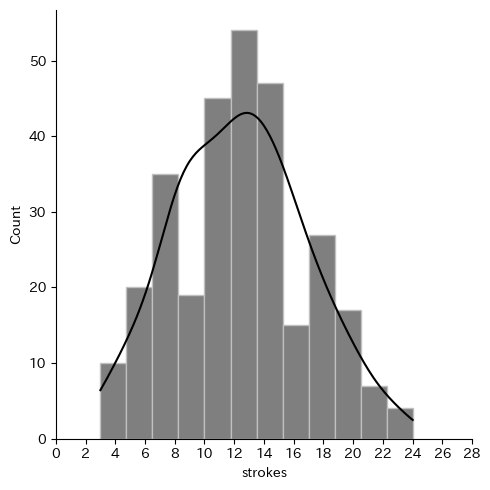

In [12]:
dist_plot = sns.displot(data=df_extra_test,x='strokes' , fill = True, color='black',edgecolor="silver", linewidth=1, kde='True')
dist_plot.set(xticks=np.arange(0,30,2))
plt.show()

In [13]:
new_df_extra = pd.merge(df_extra,df_extra_test, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1).reset_index(drop=True)

In [20]:
print([f for f in font_manager.fontManager.ttflist if 'XA' in f.name])

[FontEntry(fname='/Users/rashidalawadhi/Library/Python/3.9/lib/python/site-packages/matplotlib/mpl-data/fonts/ttf/XANO-mincho-U32.ttf', name='XANO-mincho-U32', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')]


In [21]:
data0 = np.array(img_data(new_df_extra, 0,6053, 'New Tegomin'))/255
data1 = np.array(img_data(new_df_extra, 0, 6053, 'Kaisei HarunoUmi'))/255
data2 = np.array(img_data(new_df_extra, 0, 6053, 'Klee One'))/255
data3 = np.array(img_data(new_df_extra, 0, 6053, 'Yuji Syuku'))/255
data4 = np.array(img_data(new_df_extra, 0, 6053, 'Toppan Bunkyu Gothic'))/255

In [22]:
test_data0 = np.array(img_data(df_extra_test, 0, 300, 'XANO-mincho-U32'))/255
test_data1 = np.array(img_data(df_extra_test, 0, 300, 'Shippori Mincho'))/255


In [23]:
full_data_trimmed = np.concatenate((data0, data1, data2, data3, data4), axis=0)
full_test_data = np.concatenate((test_data0, test_data1), axis=0)

In [24]:
np.save('/Users/rashidalawadhi/Documents/GitHub/NN_kanji/data/trimmed_df/full_data_trimmed', full_data_trimmed)
np.save('/Users/rashidalawadhi/Documents/GitHub/NN_kanji/data/trimmed_df/full_test_data', full_test_data)

In [27]:
new_df_extra.to_csv('/Users/rashidalawadhi/Documents/GitHub/NN_kanji/data/trimmed_df/trimmed_df.csv', index=False)
df_extra_test.to_csv('/Users/rashidalawadhi/Documents/GitHub/NN_kanji/data/trimmed_df/test_df.csv', index=False)

In [29]:
pd.read_csv('data/trimmed_df/test_df.csv')

,kanji,strokes
0,愍,13
1,瘋,14
2,縢,16
3,憑,16
4,爾,14
...,...,...
295,贅,18
296,沂,7
297,苑,8
298,泡,8
